In [1]:
import pandas as pd

In [2]:
it_adj_list = []

for line in open("./it_nonit adjective/it_adjective.txt","r",encoding="UTF8"):
    it_adj_list.append(line)

it_adj_string = ""
for line in it_adj_list:
    try:
        it_adj_string = it_adj_string + line[:line.index(",\n")]
        it_adj_string = it_adj_string + "!"
    except:
        it_adj_string = it_adj_string + line
it_adj_list = it_adj_string.split("!")
it_adj_list[0] = it_adj_list[0][1:]
del it_adj_list[-1]
it_adj_list = [adj.strip() for adj in it_adj_list]
it_dict = dict()
for adj in it_adj_list:
    word,num = adj.split(',')
    word = word[2:-1]
    num = num[1:-1]
    it_dict[word]= num

In [3]:
nonit_adj_list = []

for line in open("./it_nonit adjective/nonit_adjective.txt","r",encoding="UTF8"):
    nonit_adj_list.append(line)

nonit_adj_string = ""
for line in nonit_adj_list:
    try:
        nonit_adj_string = nonit_adj_string + line[:line.index(",\n")]
        nonit_adj_string = nonit_adj_string + "!"
    except:
        nonit_adj_string = nonit_adj_string + line
nonit_adj_list = nonit_adj_string.split("!")
nonit_adj_list[0] = nonit_adj_list[0][1:]
del nonit_adj_list[-1]
nonit_adj_list = [adj.strip() for adj in nonit_adj_list]
nonit_dict = dict()
for adj in nonit_adj_list:
    word,num = adj.split(',')
    word = word[2:-1]
    num = num[1:-1]
    nonit_dict[word]= num

In [4]:
it_total = sum(list(map(int,it_dict.values())))
nonit_total = sum(list(map(int,nonit_dict.values())))

In [5]:
no_dup_it_adj_dict = dict()
no_dup_nonit_adj_dict = dict()

for k,v in it_dict.items():
    try:
        if int(v)/it_total < int(nonit_dict[k])/nonit_total:
            pass
        else:
            no_dup_it_adj_dict[k] = v
    except:
        pass
for k,v in nonit_dict.items():
    try:
        if int(v)/nonit_total < int(it_dict[k])/it_total:
            pass
        else:
            no_dup_nonit_adj_dict[k] = v
    except:
        pass

In [6]:
no_dup_it_adj_dict

{'있다': '38491',
 '이다': '7419',
 '없다': '6319',
 '가능하다': '4790',
 '아니다': '3984',
 '그렇다': '3156',
 '필요하다': '2212',
 '연결하다': '1602',
 '정확하다': '1582',
 '이렇다': '1430',
 '간단하다': '1400',
 '건조하다': '1323',
 '빠르다': '1134',
 '높다': '1134',
 '촉촉하다': '1054',
 '중요하다': '1029',
 '가볍다': '1017',
 '편리하다': '909',
 '다르다': '816',
 '안되다': '811',
 '괜찮다': '675',
 '확실하다': '660',
 '저렴하다': '625',
 '유용하다': '588',
 '불편하다': '576',
 '인하다': '569',
 '덥다': '561',
 '부드럽다': '554',
 '충분하다': '529',
 '굉장하다': '495',
 '비슷하다': '449',
 '꾸준하다': '423',
 '심하다': '409',
 '낮다': '404',
 '밉다': '395',
 '비싸다': '386',
 '짧다': '384',
 '건강하다': '366',
 '산뜻하다': '364',
 '상당하다': '353',
 '부족하다': '347',
 '민감하다': '341',
 '적당하다': '329',
 '착하다': '328',
 '만족스럽다': '325',
 '예민하다': '306',
 '길다': '302',
 '단순하다': '294',
 '변하다': '284',
 '편안하다': '277',
 '동일하다': '271',
 '멀다': '266',
 '유명하다': '257',
 '귀찮다': '250',
 '선명하다': '248',
 '복잡하다': '246',
 '만족하다': '241',
 '이러하다': '236',
 '순하다': '229',
 '쾌적하다': '218',
 '적절하다': '216',
 '시원하다': '209',
 '맛있다': '204',
 '가깝다': '

In [43]:
def unpack_dict(keywords_dict):
    keywords = []
    keywords_values = []

    for idx,items in enumerate(keywords_dict.items()):
        key, value = items
        if idx >= 14:
            if len(keywords_values) == 15:
                keywords_values[-1] += int(value)
            else:
                keywords_values.append(int(value))
                keywords.append("기타")
        else:
            keywords.append(key)
            keywords_values.append(int(value))    
    return keywords,keywords_values


In [44]:
it_keywords,it_keywords_values = unpack_dict(no_dup_it_adj_dict)
not_it_keywords,not_it_keywords_values = unpack_dict(no_dup_nonit_adj_dict)

In [45]:
from matplotlib import pyplot as plt

In [46]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [53]:
def plot_pie(X,y):
    explode = [1/len(X) for _ in range(len(X))]
    y_sum = sum(y)
    y_ratio = [yy/y_sum for yy in y]
    plt.pie(y_ratio,labels=X,autopct='%.2f%%',explode=explode)
    plt.show()


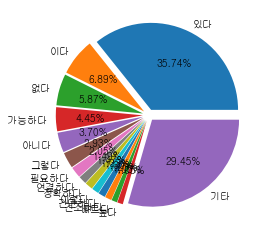

In [54]:
plot_pie(it_keywords,it_keywords_values)

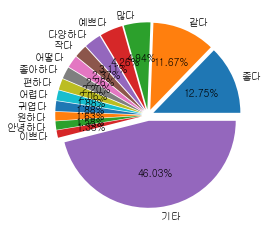

In [55]:
plot_pie(not_it_keywords,not_it_keywords_values)